<a href="https://colab.research.google.com/github/spingram/MAT421-sam/blob/main/Numbers%20and%20Binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.
Write a function my_bin_2_dec(b) where b is binary number represented by a list of ones and zeros. The last element of b represents the coefficient of 20
, the second-to-last element of b represents the coefficient of 21
, and so on. The output variable, d, should be the decimal representation of b. The test cases are provided below.

In [ ]:
def my_bin_2_dec(b):
  pow = len(b)-1
  d = 0

  for var in b :
   d = d + (var * (2**pow))
   pow = pow -1

  return d


In [ ]:
print(my_bin_2_dec([1,1,1]))
print(my_bin_2_dec([1,0,1,0,1,0,1]))
print(my_bin_2_dec([1]*25))
print(my_bin_2_dec([1]*52))
print(my_bin_2_dec([1,0,0,0,0,0,0,0,0,1,0]))
print(my_bin_2_dec([1,1,1,0,0,1,0,1,1,1,1,0,1,0,1,0,0,0,1,1,1,0,0,1,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0]))

7
85
33554431
4503599627370495
1026
4044706467128424


2. Write a function my_dec_2_bin(d), where d is a positive integer in decimal, and b is the binary representation of d. The output b must be a list of ones and zeros, and the leading term must be a 1 unless the decimal input value is 0. The test cases are provided below.

In [ ]:
def my_dec_2_bin(d):
  b = [1]
  pow = 0

  while d > (2**pow):
    pow = pow+1

  pow = pow -2
  r = d-(2**(pow + 1))

  while pow >= 0 :
    if ((2**pow)>r):
      b.append(0)
      pow = pow -1
    else :
      b.append(1)
      r = r - (2**(pow))
      pow = pow -1

  if d == 0 :
    b = [0]
  return b

In [ ]:
print(my_dec_2_bin(0))
print(my_dec_2_bin(23))
print(my_dec_2_bin(2097))


[0]
[1, 0, 1, 1, 1]
[1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1]


In [ ]:
print(my_bin_2_dec(my_dec_2_bin(12654)))

12654


Write a function my_bin_adder(b1,b2), where b1, b2 and the output variable b are binary numbers represented as in problem 1. The output variable should be computed as b = b1 + b2. Do not use your functions from problems 1 and 2 to write this function (i.e., do not convert b1 and b2 to decimal; add them, and then convert the result back to binary). This function should be able to accept inputs b1 and b2 of any length (i.e., very long binary numbers), and b1 and b2 may not necessarily be the same length.

In [ ]:
def my_bin_adder(b1, b2):
  ln = max(len(b1),len(b2))
  new = [0]*ln
  b = [0]*ln
  if len(b1) > len(b2):
    new[ln-len(b2):ln] = b2
    b2 = new
  if len(b1) < len(b2):
    new[ln-len(b1):ln] = b1
    b1 = new

  i = len(b1)-1
  carry = 0

  while i >= 0 :
    sum = carry + b1[i] + b2[i]
    if sum == 0 :
      b[i]=0
      carry = 0
    elif sum == 1 :
      b[i]=1
      carry = 0
    elif sum == 2 :
      b[i]=0
      carry = 1
    else :
      b[i]=1
      carry = 1
    sum =0
    i = i-1


  if carry == 1:
    b.insert(0,1)

  return b

In [ ]:
print(my_bin_adder([1, 1, 1, 1, 1], [1]))
print(my_bin_adder([1, 1, 1, 1, 1], [1, 0, 1, 0, 1, 0, 0]))
print(my_bin_adder([1, 1, 0], [1, 0, 1]))

[1, 0, 0, 0, 0, 0]
[1, 1, 1, 0, 0, 1, 1]
[1, 0, 1, 1]


Write a function my_ieee_2_dec(ieee), where ieee is a string contains 64 characters of ones and zeros representing a 64-bit IEEE754 number. The output should be d, the equivalent decimal representation of ieee. The input variable ieee will always be a 64-element string of ones and zeros defining a 64-bit float.

In [ ]:
def my_ieee_2_dec(ieee):
  bin = [int(digit) for digit in (ieee)]
  sign = bin[0]
  exp = bin[1:12]
  frac = bin[12:64]
  exp = my_bin_2_dec(exp)
  pow = 1
  d=0
  for var in frac :
    d = d + (var *(1/(2**pow)))
    pow = pow +1
  frac = d

  num = ((-1)**sign)*(2**(exp-1023))*(1+frac)
  return num

In [ ]:
ieee = '1100000001001000000000000000000000000000000000000000000000000000'
my_ieee_2_dec(ieee)

-48.0

In [ ]:
ieee = '0100000000001011001100110011001100110011001100110011001100110010'
my_ieee_2_dec(ieee)

3.3999999999999995

Create a graph that shows the change in the gap as numbers get larger

<function matplotlib.pyplot.show(close=None, block=None)>

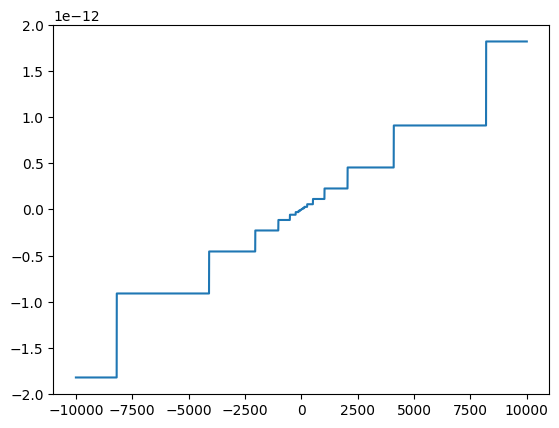

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

steps = list(range(-10000,10000,2))
gaps = np.spacing(steps)
plt.plot(steps,gaps)
plt.show


:Show how the round off error increases as the operation 1 +1/3 - 1/3 is repreated several times

In [219]:
import numpy as np
import matplotlib.pyplot as plt

def add_and_subtract(iterations):
    result = 1

    for i in range(iterations):
        result = result + 1/3

    for i in range(iterations):
        result = result - 1/3

    return result



In [220]:
steps = [1,10,100,1000,10000,100000,1000000,10000000,100000000]
loop = [0,1,2,3,4,5,6,7,8]
rounds = [0]*10
num =1
for i in loop:
  rounds[(i)] = add_and_subtract(steps[i])
  print(steps[i])
  print(rounds[i])

1
1.0
10
0.9999999999999991
100
1.0000000000000002
1000
1.0000000000000064
10000
1.0000000000001166
100000
1.0000000000019214
1000000
0.9999999999727986
10000000
1.0000000000309683
100000000
1.0000000004964023
